## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

The goal of this project is to run through an A/B test and help an e-commerce website determine if they should implement their new web-page, keep their old one or perhaps run the experiment longer to make their decision. 

<a id='probability'></a>
#### Part I - Probability

The first part of this project is to run through same basic probability

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#The seed here is set to 42 to assure I get the same answers as the online quizzes set up on Udacity.com
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`. 

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


There are 294478 entries in the dataset

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df.query('landing_page == "new_page" and group =="control"').count() + df.query('landing_page== "old_page" and group =="treatment"').count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [7]:
df.info()

#no missing values since all the columns have 294478 non-null entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  ===> Answer: we need to remove those rows from the dataset and I agree with this interpretation because we cannot be sure where those entries belong and we want to avoid any mistakes in our analysis

a. Create a new dataset that meets the specifications from Quiz 2.  Store your new dataframe in **df2**.

In [8]:
experimental_group = df.query('landing_page =="new_page" and group == "treatment"')
control_group = df.query('landing_page =="old_page" and group =="control"')

df2= pd.concat([control_group, experimental_group])

The new DataFrame only contains the rows where the __control__ group is lined up with __old_page__ and the __treatment__ group is aligned with __new_page__

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]


0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.user_id.nunique(), len(df2)

(290584, 290585)

290584 unique users, and 290585 rows in total... 1 user is repeated in the dataset!!

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.user_id.duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.user_id ==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop_duplicates(subset=['user_id'], inplace=True )

In [14]:
#Verifying that this worked out, the number should be 1 less then 290585
len(df2)

290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [16]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
control_converted = df2.query('group =="control"').converted.mean()
control_converted

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
treatment_converted = df2.query('group =="treatment"').converted.mean()
treatment_converted

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
(df2.landing_page =="new_page").mean()

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

In [20]:
difference = (treatment_converted - control_converted) * 100
difference

-0.15782389853555567

My answer: No, I dont think there is significant evidence yet to determine that the new treatment page leads to more conversion. This is because the difference in conversion rate between the treatment/experimental group and the control group is very small, less then 1% (-0.15%). We need to run more tests which are found below.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

__Null Hypothesis: Pold - Pnew >= 0__       in other words the old page is better or equal then the new page

__Alt. Hypothesis: Pnew - Pold >  0__  or __Pnew > Pold__  in other words the new page's conversion rate is better then the old page

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.

a. What is the **convert rate** for $p_{new}$ under the null? 

In [21]:
p_new= df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
p_old= df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [23]:
n_new= df2.query("landing_page =='new_page'").user_id.nunique()
n_new

145310

d. What is $n_{old}$?

In [24]:
n_old = df2.query("landing_page =='old_page'").user_id.nunique()

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
#null_vals = np.random.normal(0, diffs.std(), diffs.size)
new_page_converted = np.random.binomial(1, p_new, n_new)

In [26]:
new_page_converted

array([0, 0, 0, ..., 0, 1, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted


array([0, 1, 0, ..., 0, 0, 0])

In [28]:
old_page_converted.mean()

0.11858281592026103

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [29]:
new_page_converted.mean() - old_page_converted.mean()

0.0020695824005702995

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [30]:
new_page_conversion = np.random.binomial(n_new, p_new,  10000)/n_new
old_page_conversion = np.random.binomial(n_old, p_old,  10000)/n_old
p_diffs = new_page_conversion - old_page_conversion


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0, 0.5, 'Frequency')

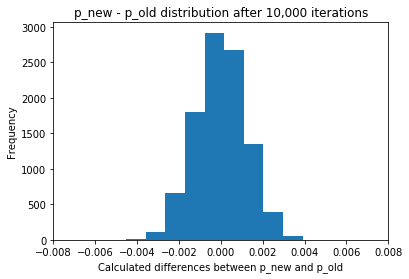

In [31]:
plt.title('p_new - p_old distribution after 10,000 iterations')
plt.hist(p_diffs)
plt.xlim(-0.008, 0.008)
plt.xlabel('Calculated differences between p_new and p_old')
plt.ylabel('Frequency')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
#the null hypothesis here was that p_new= p_old, therefore under the null the difference is 0
null_diff= 0

#for the observed difference we get
prob_new = df2.query('landing_page =="new_page"').converted.mean()
prob_old = df2.query('landing_page =="old_page"').converted.mean()

obs_diff = prob_new - prob_old
obs_diff

-0.0015782389853555567

In [33]:
(p_diffs > (prob_new -prob_old)).mean()

0.9027

90.53 % of the p_diffs values are greater than the actual difference observed in ab_data.

Text(0, 0.5, 'Frequency')

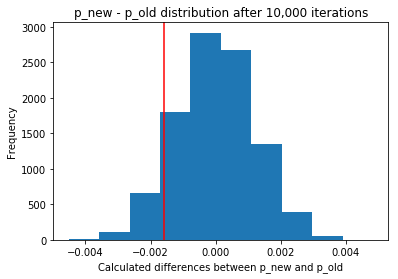

In [34]:
plt.hist(p_diffs)

boundary = obs_diff

plt.axvline(x=boundary, color = 'red'); # where our sample mean falls on null dist

plt.title('p_new - p_old distribution after 10,000 iterations')
plt.xlabel('Calculated differences between p_new and p_old')
plt.ylabel('Frequency')



The p-value here is 0.9053 which is the area of all the blue blocks starting at and to the right of the red line.

In [35]:
p_diffs.mean(), p_diffs.std(), p_diffs.var()

(-1.6706255754261642e-06, 0.001205584337036564, 1.4534335937078916e-06)

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In part j we calculated the P value which is likelyhood that our statistic emerged from our population. Since this value fell within the 95% boundry (after simulating the experiment 10,000 times, 90% of the values were greater or equal then the actual difference) then we can say (with a 1 sided test, 95% CI) that our statistic emerged from our population and that the difference between p_new - p_old  is 0 (1.29 * 10^-5). Since our Alt Hypothesis was that p_new - p_old > 0 we can reject Alt Hypothesis (since the difference is actually 0, with a very small var/std.)

## Lenght of the experiment

In [36]:
df4=df2.copy()
df4.sort_values(by='timestamp', inplace=True)
df4.iloc[0,1], df4.iloc[-1, 1], len(df4), n_old, n_new

('2017-01-02 13:42:05.378582',
 '2017-01-24 13:41:54.460509',
 290584,
 145274,
 145310)

## Duration of experiment:
As we can see, the experiment ran for 3 weeks and we collected over 290,000 results and entries. This is an appropriate duration because we were able to collect a lot of entries. Moreover, the proportion of users who visited each page is approximately 50% which means that we led an appropriate number of users to each page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [37]:
import statsmodels.api as sm


convert_old = sum(df2.query('landing_page == "old_page"').converted)
convert_new = sum(df2.query('landing_page == "new_page"').converted)
n_old = df2.query('landing_page =="old_page"').shape[0]
n_new = df2.query('landing_page =="new_page"').shape[0]

convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [38]:
#Assume a 95% CI
from scipy.stats import norm
left_boundary  = norm.ppf(0.05/2)
right_boundary = norm.ppf(1-(0.05/2))

#these are the standard z scores for a 95% CI
left_boundary, right_boundary

(-1.9599639845400545, 1.959963984540054)

In [39]:
#now we calculate the zscore for the difference using proportions_ztest 
zscore, pvalue = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller', prop_var = False)

zscore, pvalue

#null: p_old - p_new >=0
#alt:  p_new - p_old > 0


(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The zscore and p-value calculated above means we have to reject the Alternative Hypothesis which was p_new - p_old > 0   . Therefore we fail to reject our null hypothesis which was p_old - p_new >= 0  which means our old page converts equally or better then the new page. This agrees with the earlier findings.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

This is a Logistic Regression problem since we are trying to predict a categorical response: a successful or not successful conversion. Linear or Multilinear regression models require variables that are continuous whereas in our case, we have a Yes/No result. 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [40]:
df2['intercept'] = 1
df2[['ab_page_treatment','ab_page_control']] = pd.get_dummies(df2['landing_page'])

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page_treatment,ab_page_control
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [41]:
logm= sm.Logit(df2['converted'], df2[['intercept', 'ab_page_treatment']])
results = logm.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [42]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 01 Feb 2019   Pseudo R-squ.:               8.077e-06
Time:                        13:53:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept            -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page_treatment    -0.0150      0.011     -1.311      0.190      -0.037       0.007
=====================================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?


The p-value above is 0.190 which indicates that the new landing page compared to the old landing page is not statistically significant in predicting the outcome of whether or not a user converts. 
In Logistic Regression, when we use dummy variables, we compare one results in relationship to the other. In this case, we have ab_page_treatment which means ab_page_control is our baseline so the __difference__ each page has on the conversion ratio is insignificant. This p-value __is  different__ from the one found in Part II section j because here we calculated a difference which means our __null hypothesis is p_old - p_new = 0__ and our __alternative hypothesis is p_old - p_new != 0__, therefore we would be doing a two-sided test. In the previous sections we completed a 1-sided test and the null and alt. hypothesis were different.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

It is a good idea to consider other factors because we do not have many independant variables so there can be other factors such as font size, web-page layout and where everything is located that can influence the conversion ratio.  However, we cannot add too many factors in our model because we may run into problems such as overfitting, multicollinearity, Simpson's Paradox and the Curse of dimensionality which will complicate the analysis. <br /> 
<br /> 
-Overfitting occurs when our model fits too closely with the given data set, the pitfall here is that the model may not be accurate at representing new data. <br /> -Multicollinearity occurs when our independant variables are correlated which disturbs our model, coefficients and reliability. <br /> -Simpson's paradox is a problem statisticians often run into when adding and aggregating too many variables. Relationships are often missed because the data is too aggreggated and different relationships and conclusions may appear depending on what biases and factors you look into. <br /> -Finally, the Curse of dimensionality is a problem statisticians face when adding too many variables and factors. Generally, the more variables we add, then the amount of data we need grows exponentially. In our case, this might mean running both landing pages for months to obtain an adequate amount of data.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [43]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [44]:
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [45]:
### Create the necessary dummy variables
df_new[['Canada', 'UK', 'USA']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page_treatment,ab_page_control,Canada,UK,USA
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0


In [46]:
logm2 = sm.Logit(df_new['converted'], df_new[['intercept', 'Canada','UK']])
results2 = logm2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 01 Feb 2019   Pseudo R-squ.:               1.521e-05
Time:                        13:53:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
Canada        -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

Since all the p-values in column P>lzl  are bigger then 0.05 we know these factors are not statistically significant in determining whether or not a conversion occurs. The last step is to determine if there is an interaction between the country and the new page and old page. This is completed below.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [47]:
df_new['Canada_treatment'] = df_new['Canada'] * df_new['ab_page_treatment']
df_new['UK_treatment']     = df_new['UK']     * df_new['ab_page_treatment']

In [48]:
### Fit Your Linear Model And Obtain the Results
logm3 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page_treatment', 'Canada', 'UK', 'Canada_treatment', 'UK_treatment']])
results3= logm3.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Fri, 01 Feb 2019   Pseudo R-squ.:               3.482e-05
Time:                        13:53:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept            -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page_treatment    -0.0206      0.014     -1.505      0.132      -0.047       0.006
Canada               -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK                   -0.0057      0.019     -0.306      0.760      -0.043       0.031
Canada_treatment     -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK_treatment          0.0314      0.027      1.181      0.238      -0.021       0.084
=====================================================================================
"""

Results: The associated p-values in the table above are all above 0.05 or 5% which means we fail to reject the null hypothesis and reject the alternative hypothesis that these factors affect the conversion rate. The null hypothesis is always a defensive one where 'the conversion rate of the old page is better or equal then the conversion rate of the new page and that the user_id's country does not have effect on the conversion rate. Since the p-values are so high, even with the interaction variables included, they are not statistically significant in helping us determine a relationship with the conversion rates.   

## Conclusions

In conclusion, we were able to look at and analyze the A/B test of an ecomerce website and we determined that there was no difference with the conversion rates between the new and old landing page. In addition, the test ran for 3 weeks and both landing pages had an equivalent number of visitors. We ran an A/B test and a Logistic regression to determine this and had identical conclusions. Finally, we tried to determine if the location where the user resides ('country') had an effect on the conversion rates of the old and new landing page but again we discovered that this parameter was not meaningful and did not have any interaction and any impact in our model. 

Ressources: The outline and enumerated questions were provided by udacity.com The format was kept to help the reader understand the order of the analysis. Other ressources are indicated below
- Two-sample Proportion Hypothesis Testing with Statsmodels http://knowledgetack.com/python/statsmodels/proportions_ztest/
- Simpson's Paradox:  https://www.youtube.com/watch?v=ebEkn-BiW5k
- Multicollinearity: www.statisticssolutions.com/multicollinearity/
- Curse of Dimensionality  https://www.youtube.com/watch?v=QZ0DtNFdDko